# Previous X

doubly linked lists with chains as nextlink and chains as previouslink of length n (user specified)

![previous x anim](res/previousxanim.gif)

so lets just write it procedurally with a next x list that we keep track of

task:   
running while loop populating list with random integers  
every two seconds scrape the last 20 of the running list    
do this 10 times  
save that to a bar chart for animation sequence  



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

random_list = []
go = True
all_last_twentys = []

start_time = time.time()
i = 0
while go:
    # add random number
    random_list.append(np.random.randint(0,100))

    # calculate how much time has passed since loop started
    elapsed_time = time.time() - start_time

    # every 2 seconds scrape the last 20 of the list
    # every 2 seconds reset 2 seconds counter
    # every time we reset 2 seconds counter, we increment i and stop at i == 10
    if elapsed_time > 2:
        start_time = time.time()
        i += 1

        # every 2 seconds get the last 20 of the list
        all_last_twentys.append(random_list[-20:])
    if i == 10:
        go = False

In [2]:
len(all_last_twentys)

10

FileNotFoundError: [Errno 2] No such file or directory: 'last_twenty_frames/image_0.png'

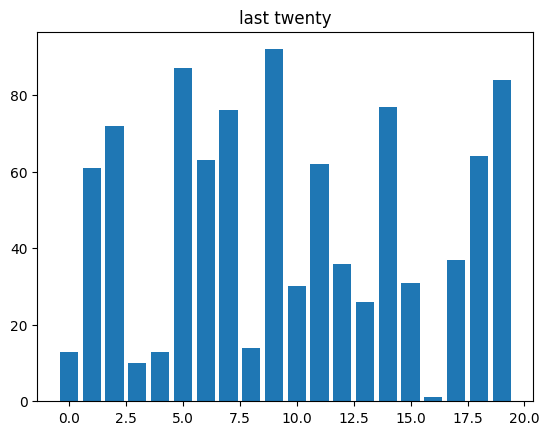

In [3]:
# name the file sequentially
i = 0
n = 20
for last_twenty in all_last_twentys:
    x_axis = [i for i in range(n)]
    plt.title("last twenty")
    plt.bar(x_axis, last_twenty)
    plt.savefig(f"last_twenty_frames/image_{i}.png")
    plt.close()
    # update file name
    i += 1

gemini code to convert image frames to animation

In [ ]:
import cv2
import os
import re

def create_mp4_from_images(image_folder, output_path, fps=30, image_pattern=r"image_\d+\.png"):
    """
    Creates an MP4 video from a sequence of images in a folder.

    Args:
        image_folder (str): The path to the folder containing the images.
        output_path (str): The path to the output MP4 video file.
        fps (int, optional): The frames per second of the output video. Defaults to 30.
        image_pattern (str, optional): A regular expression pattern to match image filenames.
            Defaults to "image_\\d+\\.png", which matches files like "image_001.png", "image_123.png", etc.
            Use raw strings (r"pattern") to avoid issues with backslashes in regex patterns.
    """
    images = [img for img in os.listdir(image_folder) if re.search(image_pattern, img)]
    # Sort the images.  Important for correct video sequence.
    images.sort()  # Simple sort, might need more robust sorting for complex filenames

    if not images:
        print(f"Error: No images found in the folder matching the pattern '{image_pattern}'.  Folder: {image_folder}")
        return

    # Determine the frame size from the first image.
    first_image_path = os.path.join(image_folder, images[0])
    img = cv2.imread(first_image_path)
    if img is None:
        print(f"Error: Could not read the first image: {first_image_path}.  Check if the path is correct and the image is valid.")
        return
    height, width, channels = img.shape

    # Define the video writer.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Write each image to the video.
    for image in images:
        image_path = os.path.join(image_folder, image)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Could not read image {image_path}. Skipping this frame.")
            continue  # Skip to the next image
        out.write(img)

    # Release the video writer.
    out.release()
    print(f"Successfully created video: {output_path} from images in {image_folder}")

def main():
    """
    Main function to run the image-to-video conversion.
    """
    # Example usage:
    image_folder = "last_twenty_frames"  # Replace with the path to your image folder
    output_path = "output.mp4"  # Replace with the desired output path
    fps = 0.5  # You can change the frames per second
    image_pattern = r"image_\d+\.png" # Example pattern, change as needed

    # Create a dummy image folder and images if it doesn't exist
    if not os.path.exists(image_folder):
        os.makedirs(image_folder)
        for i in range(10):  # Create 10 dummy images
            import numpy as np
            dummy_image = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) # Create a random image
            cv2.imwrite(os.path.join(image_folder, f"image_{i:03d}.png"), dummy_image) # save the image

    create_mp4_from_images(image_folder, output_path, fps, image_pattern)



if __name__ == "__main__":
    main()


# display the time based animation of the distribution of random numbers being populated by grabbing the last twenty every 2 seconds

please see output.mp4



In [4]:
from IPython.display import Video, display
video_path = "res/output.mp4"

video = Video(video_path)
display(video)

# Okay
# So how do we create this in a class centric way?


well i think we can take our doublylinked class and modify it a little  

if we convert the nextlink and previouslink connectors from the link class of our doublylinked list into chains themselves of length n
we can easily pull out the data of the last x  

so multiple ways to do this including the procedural way i just did above but we want a class oriented way to do it


so lets work on adding previousn and nextn links to our doubly linked list class

# Here is our doublylinkedlist class and usage using the numbers 1 through 5

In [5]:
class list_index:
    def __init__(self, list_item):
        self.list_item = list_item
        self.next_list_item = None
        self.previous_list_item = None

class llist:
    def __init__(self):
        self.firstitem = None
        self.enditem = None
        self.length = 0

    def add_item(self, item):
        new_list_entry = list_index(item)
        self.length += 1
        if self.firstitem == None:
            self.firstitem = new_list_entry
            self.enditem = new_list_entry
        else:
            new_list_entry.previous_list_item = self.enditem
            self.enditem.next_list_item = new_list_entry
            self.enditem = new_list_entry

    def get_item(self, index):
        if index >= 0:
            current_index = self.firstitem
            for i in range(index):
                current_index = current_index.next_list_item
            return current_index.list_item
        elif index == -1:
            return self.enditem.list_item
        else:
            current_step = self.enditem
            for i in range(1, abs(index)):
                current_step = current_step.previous_list_item
        return current_step.list_item

In [6]:
dl_list = llist()

dl_list.add_item(1)
dl_list.add_item(2)
dl_list.add_item(3)
dl_list.add_item(4)
dl_list.add_item(5)

negative_list = [-i for i in range(1, 6)]
negative_list = [-1,-2,-3,-4,-5]

# 1 based negative indexing
for item in negative_list:
    print(dl_list.get_item(item))

5
4
3
2
1


In [7]:
dl_list = llist()

dl_list.add_item(1)
dl_list.add_item(2)
dl_list.add_item(3)
dl_list.add_item(4)
dl_list.add_item(5)

# 0 based positive indexing
for i in range(dl_list.length):
    print(dl_list.get_item(i))

1
2
3
4
5


In [8]:
# please see the demo animation in readme, 
# doubly linked lists just wire up the previous link before resetting the endlink tape which you can see
# here ^

<hr>

convert this implementation to use chains for its next and previous connections of length n (n specified by user)


well maybe a static previous n and next n is bad and we should only care about in the moment previous, in that case we dont have to change our doubly linked class at all as you can see in our for loops we are using dl_list to iterate through the whole list

if we just use the already implemented negative indexing and a constrained for loop we can already do any node of slicing starting from the n

here is an example of the outputs above

lets get the last 3

In [9]:
# print the whole list
for i in range(dl_list.length):
    print(dl_list.get_item(i))

1
2
3
4
5


okay use negative indexing to only get the last 3

In [10]:
last_n = 3
for i in range(1, last_n+1):
    print(dl_list.get_item(-i))

5
4
3


right?

so whats the problem with this?  

well this is an iterative approach the previous x are not known  

n has to be counted to as you can see in the for loop above  

as n grows large, the number of counts grows large, and your program slows down  


so we need to keep going  



So whats the current TODO:

In [11]:
# TODO: implement python slicing
# mostly care about negative slicing
# negative slicing already works in a user defined for loop using the negative indexing
# built into get_index and a for loop to iterate through last n as you can see again by the duplicate cell above that i've coppied beneath this todo

In [12]:
last_n = 3
for i in range(1, last_n+1):
    print(dl_list.get_item(-i))

5
4
3


okay so rewrite todo for when i come back for further touches

# TODO: mf just build python list slicing but dont make it count up to n every god damn time and thats it (into doubly linked lists)

In [13]:
# TODO: mf just build python list slicing but dont make it count up to n every god damn time and thats it (into doubly linked lists)